In [1]:
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

In [1]:
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/emmayu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import sys
import matplotlib as mpl
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)

python 2.7.12 |Anaconda 2.1.0 (x86_64)| (default, Jun 29 2016, 11:09:23) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]

pandas 0.19.0
numpy 1.11.2


In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273


##### data exploration

In [5]:
# some summary statistics.

In [6]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


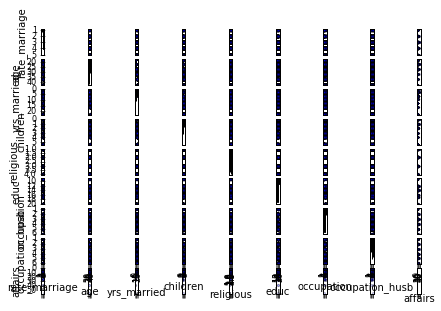

In [7]:
#need to run this to see the figures. 
#%matplotlib inline

import matplotlib.pyplot as plt

axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.savefig('scatter_matrix.png')
#plt.show()

In [8]:
df['affair_bool'] = (df.affairs > 0).astype(int)

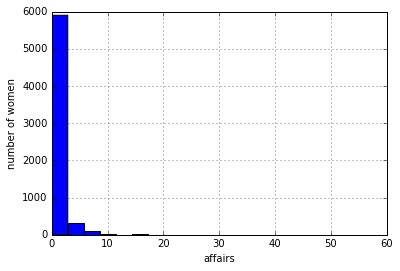

In [9]:
df['affairs'].hist(bins=20)
xlabel('affairs')
ylabel('number of women')

In [10]:
#Exploring affairs vs marraige ratings : 

In [11]:
rating_vs_target = pd.crosstab(df['rate_marriage'], df['affair_bool'])
rating_vs_target

affair_bool,0,1
rate_marriage,,
1.0,25,74
2.0,127,221
3.0,446,547
4.0,1518,724
5.0,2197,487


In [12]:
total_ratings = rating_vs_target.apply(sum)
total_ratings

affair_bool
0    4313
1    2053
dtype: int64

In [13]:
rating_vs_target /= total_ratings
rating_vs_target

affair_bool,0,1
rate_marriage,,
1.0,0.005796,0.036045
2.0,0.029446,0.107647
3.0,0.103408,0.266439
4.0,0.351959,0.352655
5.0,0.509390,0.237214


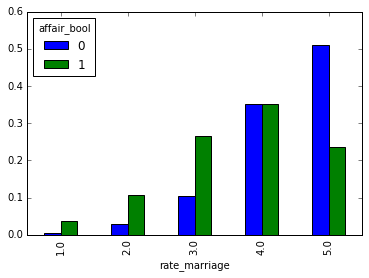

In [14]:
rating_vs_target.plot(kind='bar')

##### Conclusion - Women who rate their marriages higher have lesser number of affairs. 

In [88]:
#splitting the model into train and test sets

In [89]:
from sklearn.cross_validation import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [90]:
train_y = x_train["affair_bool"]

In [91]:
test_y = x_test["affair_bool"]

In [92]:
x_train = x_train.drop("affairs", axis = 1, inplace = False)
x_train = x_train.drop("affair_bool", axis = 1, inplace = False)

In [93]:
x_test = x_test.drop("affairs", axis = 1, inplace = False)
x_test = x_test.drop("affair_bool", axis = 1, inplace = False)

In [94]:
#fitting the model

In [66]:
logit = linear_model.LogisticRegression()
logit.fit(x_train,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
#making predictions. By default, 0.5 is chosen as the threshold

In [68]:
predicted = logit.predict(x_test)

In [69]:
#calculating accuracy

In [70]:
np.mean((predicted - test_y)**2)

0.28100470957613816

In [71]:
#coefficients

In [72]:
logit.coef_

array([[-0.68386585, -0.04990847,  0.10236941, -0.01012387, -0.35709764,
        -0.02578616,  0.16064607,  0.01511299]])

In [73]:
logit.intercept_

array([ 3.12436788])

In [74]:
weights = pd.Series(logit.coef_[0],
                 index= x_train.columns.values)
weights.sort_values()

rate_marriage     -0.683866
religious         -0.357098
age               -0.049908
educ              -0.025786
children          -0.010124
occupation_husb    0.015113
yrs_married        0.102369
occupation         0.160646
dtype: float64

##### Conclusions - We observed from the bar graph that a higher marriage rating means a lower chance of having an affair. The negative coefficient value of rate_marriage variable - -0.683867 tells us exactly that. 

In [75]:
# We observe that the occupation husb and occupation columns are categorical columns. We need to make them categorical so we will use design matrices.
# The C(occupation_husb) and C(occupation) is doing just that

In [76]:
y, X = dmatrices('affair_bool ~ rate_marriage + age + educ + children + C(occupation_husb) + C(occupation) + yrs_married', df, return_type = 'dataframe')

In [77]:
logit_categorical = linear_model.LogisticRegression(fit_intercept = False, C = 1e9)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
logit_categorical.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
logit_categorical.coef_

array([[  1.93622038e+00,   6.02365061e-02,   1.71663532e-01,
          4.13371594e-02,   1.18382410e-02,  -3.75502223e-05,
          8.04116435e-01,   1.07608806e+00,   8.14085260e-01,
          1.44536830e+00,   1.60935419e+00,  -7.31551880e-01,
         -6.04987410e-02,   3.23805330e-03,  -3.87799737e-02,
          1.06604496e-01]])

In [37]:
weights_categories = pd.Series(logit_categorical.coef_[0],
                 index= X.columns.values)
weights_categories.sort_values()

rate_marriage               -0.731552
age                         -0.060499
children                    -0.038780
C(occupation_husb)[T.6.0]   -0.000038
educ                         0.003238
C(occupation_husb)[T.5.0]    0.011838
C(occupation_husb)[T.4.0]    0.041337
C(occupation_husb)[T.2.0]    0.060237
yrs_married                  0.106604
C(occupation_husb)[T.3.0]    0.171664
C(occupation)[T.2.0]         0.804116
C(occupation)[T.4.0]         0.814085
C(occupation)[T.3.0]         1.076088
C(occupation)[T.5.0]         1.445368
C(occupation)[T.6.0]         1.609354
Intercept                    1.936220
dtype: float64

In [38]:
# This makes more sense. Let's calculate the accuracy insample 

In [39]:
logit_categorical.score(X_train, y_train)

0.71970377019748655

In [40]:
# Let's now check the out of sample test accuracy 

In [41]:
predicted_logit_categorical = logit_categorical.predict(X_test)

In [42]:
metrics.accuracy_score(y_test, predicted_logit_categorical)

0.73403141361256541

In [43]:
#getting the predicted probabilities.
predicted_prob = logit_categorical.predict_proba(X_test)

In [44]:
predicted_class_1 = [item[1] for item in predicted_prob]


In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_class_1)
roc_auc = metrics.auc(fpr,tpr)

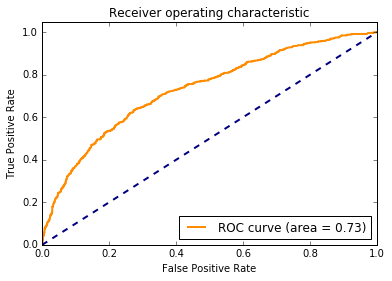

In [46]:
#adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()


### Switch to Emma

What if the effect of husband's occupation depends on the wife's occupation, or the effect of children depends on years married? 

We can add features to include interaction terms. First let's have a look at what feature we have now.

In [97]:
X_train.head()

,Intercept,C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],rate_marriage,age,educ,children,yrs_married
2411,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,27.0,16.0,1.0,6.0
4083,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,42.0,14.0,4.0,23.0
3196,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,14.0,4.0,23.0
3035,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,22.0,12.0,0.0,2.5
1772,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,22.0,14.0,0.0,2.5


We do not want to create interaction terms with intercept because that will simply be the feature itself. Lets drop be intercept column first.

In [98]:
X_train= X_train.drop('Intercept', axis=1)
X_test= X_test.drop('Intercept', axis=1)

In [99]:
print X_train.shape 
print X_test.shape 
X_train.head()

(4456, 15)
(1910, 15)


,C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],rate_marriage,age,educ,children,yrs_married
2411,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,27.0,16.0,1.0,6.0
4083,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,42.0,14.0,4.0,23.0
3196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,14.0,4.0,23.0
3035,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,22.0,12.0,0.0,2.5
1772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,22.0,14.0,0.0,2.5


We can see the range of values is different for each numerical variables. Since the values of coefficience matter in regularization, we want to standardize the data first (only numerical variables). 

In [100]:
for i in ['rate_marriage','age','educ','children','yrs_married']:
    X_train[i]= (X_train[i] - X_train[i].mean()) / X_train[i].std()
    X_test[i]= (X_test[i] - X_test[i].mean()) / X_test[i].std()

In [101]:
# ideally we want to standardize training/testing data the same way. 
# but considering after training the model one may not keep the original 
# training data. Let's standardized the testing data with its own mean/std.


In [103]:
X_train.head()

,C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],rate_marriage,age,educ,children,yrs_married
2411,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.921467,-0.309063,0.805149,-0.279448,-0.417580
4083,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.121209,1.900561,-0.104984,1.822186,1.934982
3196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.921467,1.164020,-0.104984,1.822186,1.934982
3035,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.921467,-1.045604,-1.015117,-0.979992,-0.901932
1772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.163885,-1.045604,-0.104984,-0.979992,-0.901932


We can see the current dataset has 15 features. With PolynomialFeatures, we can create all second order features in one command. 

In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

In [105]:
print X_train_2.shape 
print X_test_2.shape 

(4456, 136)
(1910, 136)


There is 1 feature for the intercept, 15 original features, 15 second order features for the original 15 features, and 15-choose-2(105) second order interacting features. The total number of features is 136 as expected.

The outputs of PolynomialFeatures are numpy arrays. Let's add the column names back and make some dataframes. 

In [106]:
target_feature_names = poly.get_feature_names(X_train.columns.values)
X_train_2_df = pd.DataFrame(X_train_2, columns = target_feature_names)
X_test_2_df = pd.DataFrame(X_test_2, columns = target_feature_names)

In [108]:
X_train_2_df.head()

,1,C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],...,age^2,age educ,age children,age yrs_married,educ^2,educ children,educ yrs_married,children^2,children yrs_married,yrs_married^2
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.095520,-0.248842,0.086367,0.129059,0.648265,-0.224997,-0.336215,0.078091,0.116692,0.174373
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.612132,-0.199528,3.463176,3.677551,0.011022,-0.191300,-0.203142,3.320364,3.525898,3.744156
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.354942,-0.122203,2.121061,2.252357,0.011022,-0.191300,-0.203142,3.320364,3.525898,3.744156
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.093289,1.061411,1.024684,0.943064,1.030463,0.994807,0.915566,0.960385,0.883886,0.813481
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.093289,0.109772,1.024684,0.943064,0.011022,0.102883,0.094688,0.960385,0.883886,0.813481


Now let's fit a new logistic regression with our freshly made features :) For easy comparison, we use the same parameters as used in the previous model.

In [109]:
model = linear_model.LogisticRegression(fit_intercept = False, penalty = 'l2', C= 1e9)
model.fit(X_train_2_df,y_train)

print 'train_score = ', model.score(X_train_2_df, y_train)
    
predicted = model.predict(X_test_2_df)
print 'test_score = ', metrics.accuracy_score(y_test, predicted)

train_score =  0.734066427289
test_score =  0.716753926702


What are the most important features this time?

In [113]:
weights_categories = pd.Series(model.coef_[0],
                 index= X_train_2_df.columns.values)
topindices = np.argsort(-np.abs(model.coef_[0]))[:10]
weights_categories[topindices][:10]

yrs_married                                       32.016408
C(occupation)[T.6.0] yrs_married                 -29.755465
C(occupation)[T.4.0] yrs_married                 -29.612845
C(occupation)[T.5.0] yrs_married                 -29.490073
C(occupation)[T.2.0] yrs_married                 -29.381828
C(occupation)[T.3.0] yrs_married                 -29.298209
C(occupation_husb)[T.2.0] C(occupation)[T.3.0]    18.607479
C(occupation_husb)[T.2.0] C(occupation)[T.4.0]    18.350060
C(occupation_husb)[T.2.0] C(occupation)[T.6.0]    18.334311
C(occupation_husb)[T.2.0] C(occupation)[T.2.0]    18.280836
dtype: float64

The testing error is a bit larger than the training error. We may be overfitting the dataset. Why don't we try some regularization? 

In [114]:
def fit_order2(pen,reg):
    model = linear_model.LogisticRegression(fit_intercept = False, penalty = pen, C= reg)
    model.fit(X_train_2_df,y_train)
    
    #print model.coef_
    train_score = model.score(X_train_2_df, y_train)
    
    predicted = model.predict(X_test_2_df)
    test_score = metrics.accuracy_score(y_test, predicted)
    
    return train_score, test_score, model.coef_[0]

Let's train a suite of models with various regularization strength.

In [115]:

penalties = [1e9, 1e6, 1e4, 1e2, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4]
types = ['l1', 'l2']

train_score = np.zeros([len(types),len(penalties)])
test_score = np.zeros([len(types),len(penalties)])
coeff = np.zeros([len(types),len(penalties),X_train_2_df.shape[1]])

In [116]:
for i in range(len(types)):
    for j in range(len(penalties)):
        (train_score[i,j], test_score[i,j], coeff[i,j,:]) = fit_order2(types[i], penalties[j])

In [117]:
print train_score[0,:]
print test_score[0,:]


[ 0.73361759  0.73361759  0.73361759  0.73384201  0.73406643  0.73002693
  0.72778276  0.71633752  0.67549372  0.67549372]
[ 0.71675393  0.71675393  0.71675393  0.71623037  0.71570681  0.71413613
  0.72984293  0.73560209  0.68219895  0.68219895]


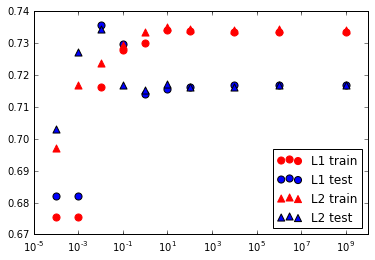

In [118]:
# add line, clean the code
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot()
labels = ['L1', 'L2']
markers = ['o','^']
ax.set_xscale('log')
ax.scatter(penalties, train_score[0,:], color='r',label = 'L1 train',marker=markers[0], s=50)
ax.scatter(penalties, test_score[0,:],label = 'L1 test', marker=markers[0], s=50)

ax.scatter(penalties, train_score[1,:], color='r',label = 'L2 train',marker=markers[1], s=50)
ax.scatter(penalties, test_score[1,:],label = 'L2 test', marker=markers[1], s=50)
ax.set_xscale('log')
plt.legend(loc=4) #, fontsize=25
plt.show()

In [119]:
# let's extract top 10 most important word for l2, week reguarlization
l1indices = np.argsort(-np.abs(coeff[0,0,:]))[:10]
l2indices = np.argsort(-np.abs(coeff[1,0,:]))[:10]
#print indices
l1coeff = coeff[0,:,l1indices]
l2coeff = coeff[1,:,l2indices]

In [120]:
l1words = weights_categories[l1indices].index
l2words = weights_categories[l2indices].index
print 'L1 regularization'
print l1words
print ''
print 'L2 regularization'
print l2words

L1 regularization
Index([u'C(occupation_husb)[T.3.0] C(occupation)[T.6.0]',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.3.0]',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.6.0]',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.4.0]',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.2.0]', u'yrs_married',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.5.0]',
       u'C(occupation_husb)[T.6.0] C(occupation)[T.3.0]', u'age',
       u'C(occupation_husb)[T.6.0] C(occupation)[T.6.0]'],
      dtype='object')

L2 regularization
Index([u'yrs_married', u'C(occupation)[T.6.0] yrs_married',
       u'C(occupation)[T.4.0] yrs_married',
       u'C(occupation)[T.5.0] yrs_married',
       u'C(occupation)[T.2.0] yrs_married',
       u'C(occupation)[T.3.0] yrs_married',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.3.0]',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.4.0]',
       u'C(occupation_husb)[T.2.0] C(occupation)[T.6.0]',
       u'C(occupation_husb)[T.2.0] C(occup

In [121]:
actual_pen = [1/i for i in penalties]

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 12

def make_coefficient_plot(coeff, words, penalty_list, title):
    
    cmap = plt.get_cmap('Blues')
    
    xx = penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_words = coeff


    
    for i in xrange(len(words)):
        color = cmap(0.8*((i+1)/(len(words)*1.2)+0.15))
        plt.plot(xx, coeff[i:i+1].flatten(),
                 '-', label=words[i], linewidth=4.0, color=color)
        
    #for i in xrange(len(l2_words)):
    #    color = cmap_l2(0.8*((i+1)/(len(l2_words)*1.2)+0.15))
    #    plt.plot(xx, (-1)*l2coeff[i:i+1].flatten(),
    #             '-', label=l2_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc=1, ncol=2, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e4, -1, 2])
    #plt.ylim([-0.5,0.5])
    plt.xlim([1, 1e4])
    plt.title(title)
    plt.xlabel('Lambda (penalty)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')

    plt.rcParams.update({'font.size': 25})
    plt.tight_layout()

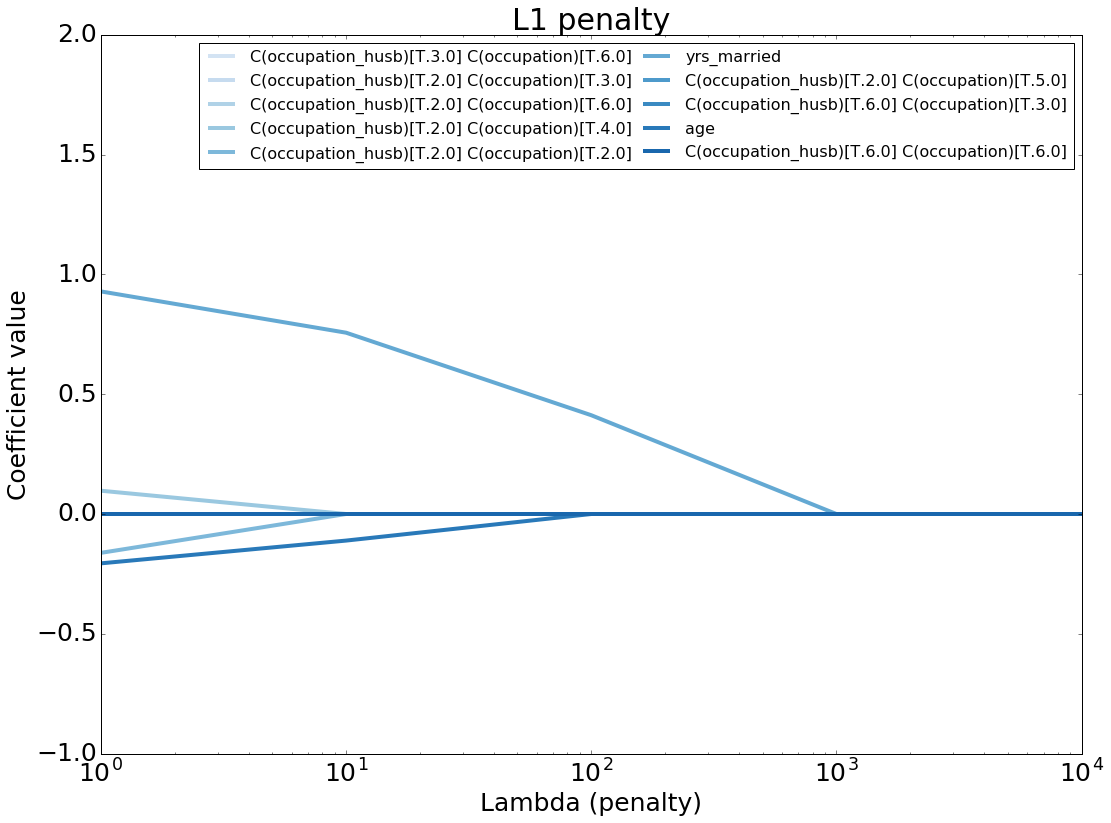

In [164]:
make_coefficient_plot(l1coeff, l1words, actual_pen, 'L1 penalty')

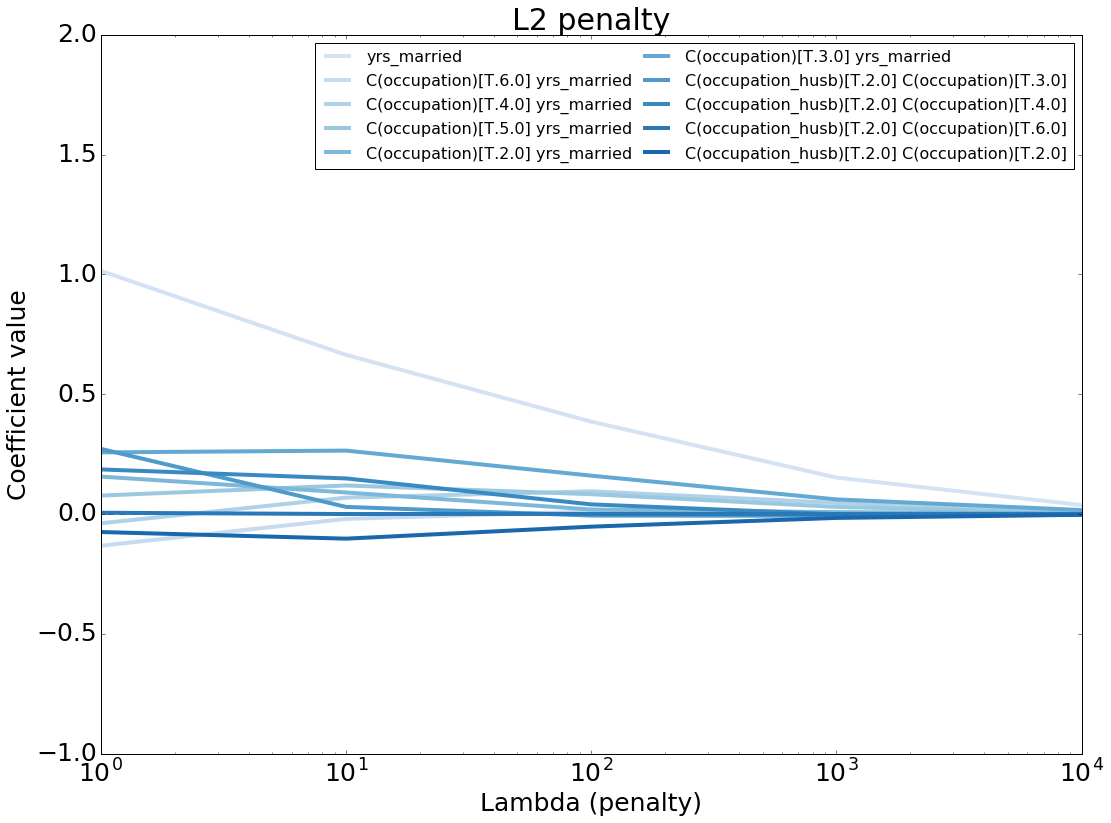

In [165]:
make_coefficient_plot(l2coeff, l2words, actual_pen, 'L2 penalty')

### Caveat:
There are only ~6k data points in this dataset, so the difference in training/testing error could just be noise.

We will do better by doing cross-validation, but it's hard to gain much just because we don't have much data to start with.